# RAIN DATA PREDICTION

## ROGER BAIGES & LLUC FURRIOLS

##### IMPORT NECESSARY LIBRARIES

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [15]:
# Load the data from the assets folder

rain_data = pd.read_csv('../assets/rain_data.csv')

In [16]:
print(f'Shape of the data: {rain_data.shape}')
rain_data.head()

Shape of the data: (67021, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes


# Preprocessing

In [17]:
print(rain_data.dtypes)
rain_data.describe()

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,65864.000000,65940.000000,64271.000000,37591.000000,34831.000000,61576.000000,65971.000000,65328.000000,65257.000000,64388.000000,59750.000000,59761.000000,41303.000000,40071.000000,65689.000000,64811.000000
mean,12.552091,22.480866,3.669512,5.122383,6.514499,42.142150,14.634764,19.187194,72.074781,57.521433,1016.524147,1014.237604,5.053870,5.184148,16.888700,20.822340
std,6.371143,7.108686,10.981571,3.950017,3.932475,14.638665,9.227585,9.171806,18.481003,21.741282,7.343975,7.283068,2.778949,2.620094,6.427827,6.931696
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,8.000000,17.200000,0.000000,2.400000,3.200000,31.000000,7.000000,13.000000,61.000000,42.000000,1011.700000,1009.300000,2.000000,3.000000,12.200000,15.800000
50%,12.300000,21.800000,0.000000,4.400000,6.800000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,6.000000,6.000000,16.500000,20.100000
75%,17.200000,27.400000,2.200000,7.000000,9.900000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.500000,1019.200000,7.000000,7.000000,21.400000,25.500000
max,33.900000,47.300000,371.000000,77.300000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.300000,1038.500000,8.000000,8.000000,39.000000,46.700000


In [18]:
# Create new variable from the date column

rain_data['Date'] = pd.to_datetime(rain_data['Date'])
rain_data['Month'] = rain_data['Date'].dt.month
rain_data['Day'] = rain_data['Date'].dt.day
rain_data['Year'] = rain_data['Date'].dt.year
rain_data.drop('Date', axis=1, inplace=True)

In [19]:
# Create 'Temp_difference' - difference between the maximum and minimum temperature of the day
rain_data['Temp_difference'] = rain_data['MaxTemp'] - rain_data['MinTemp']

# Create 'Humidity_difference' - difference between morning and afternoon humidity
rain_data['Humidity_difference'] = rain_data['Humidity9am'] - rain_data['Humidity3pm']

# Create 'Pressure_difference' - difference between morning and afternoon pressure
rain_data['Pressure_difference'] = rain_data['Pressure9am'] - rain_data['Pressure3pm']

# Create 'WindSpeed_difference' - difference between morning and afternoon wind speed
rain_data['WindSpeed_difference'] = rain_data['WindSpeed9am'] - rain_data['WindSpeed3pm']

"""# Create 'TotalSunshine' - potential sunshine duration up to the observed moment
# Assuming that 'Sunshine' is the observed sunshine and we need to consider days without observation
rain_data['TotalSunshine'] = rain_data['Sunshine'].fillna(0) * (rain_data['DayOfYear'] / 365)

# Create 'DayOfYear' from 'Month', 'Day', 'Year' to calculate 'TotalSunshine'
rain_data['DayOfYear'] = pd.to_datetime(rain_data[['Year', 'Month', 'Day']]).dt.dayofyear"""

"""# Create 'IsRainyDay' - binary variable if it rained today
rain_data['IsRainyDay'] = (rain_data['Rainfall'] > 0).astype(int)"""

# Add a print statement to show the shape of the DataFrame and the newly added columns
print("Shape of the data:", rain_data.shape)
print("Newly added columns:", [col for col in rain_data.columns if 'difference' in col or 'TotalSunshine' in col or 'IsRainyDay' in col])


Shape of the data: (67021, 29)
Newly added columns: ['Temp_difference', 'Humidity_difference', 'Pressure_difference', 'WindSpeed_difference']


# Missing values

,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,1157,1.726325,float64
MaxTemp,1081,1.612927,float64
Rainfall,2750,4.103192,float64
Evaporation,29430,43.911610,float64
Sunshine,32190,48.029722,float64
WindGustDir,5487,8.186986,object
WindGustSpeed,5445,8.124319,float64
WindDir9am,4751,7.088823,object
WindDir3pm,2288,3.413855,object


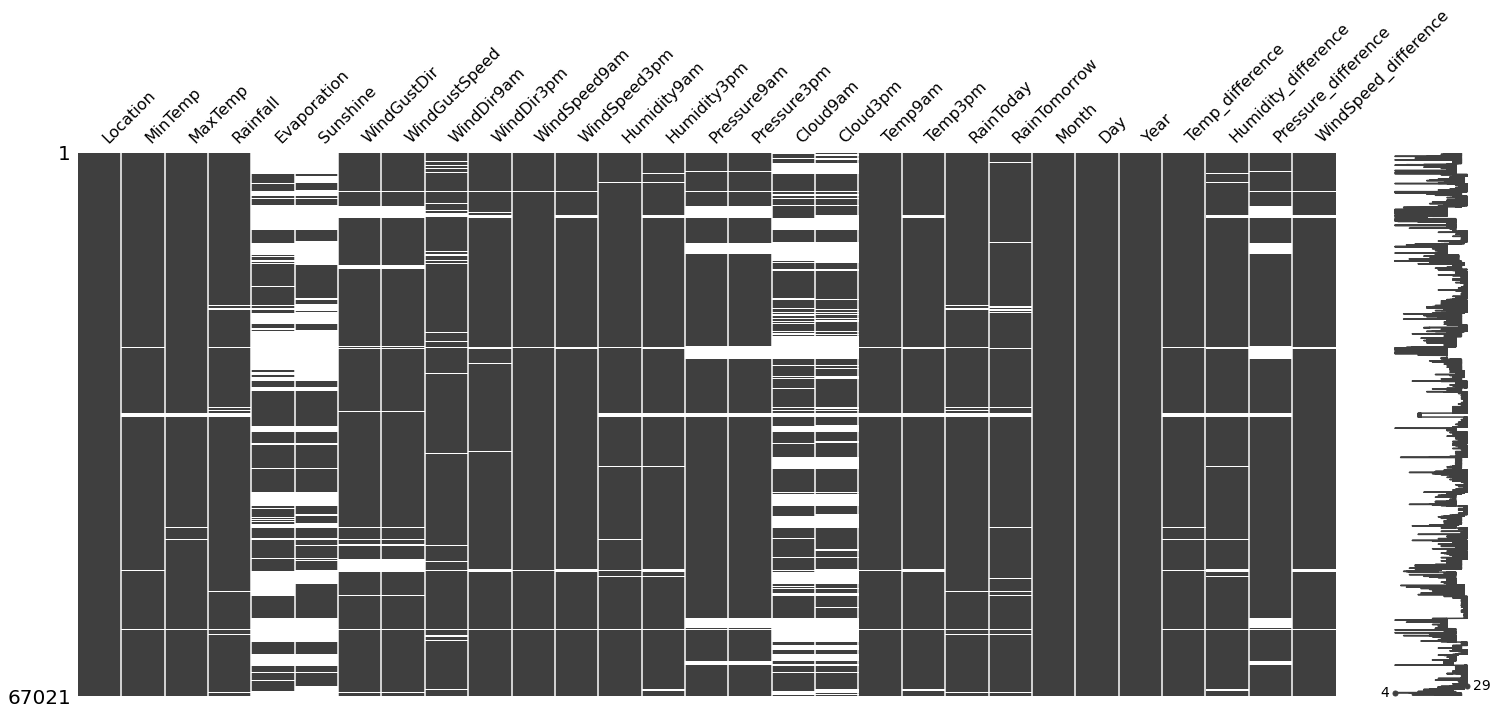

In [20]:
import missingno as msno

# Visualize the missing values as a matrix

msno.matrix(rain_data)

def create_missing_data_frame(data):
    # Create a table with data missing 
    missing_values=data.isnull().sum() # missing values

    percent_missing = data.isnull().sum()/data.shape[0]*100 # missing value %

    value = {
        'missing_values ':missing_values,
        'percent_missing %':percent_missing , 
        'data type' : data.dtypes
    }
    frame=pd.DataFrame(value)
    return frame

missing_data=create_missing_data_frame(rain_data)
missing_data

Shape of the data: (53362, 29)


,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,897,1.680971,float64
MaxTemp,857,1.606012,float64
Rainfall,1948,3.650538,float64
Evaporation,15771,29.554739,float64
Sunshine,18531,34.726959,float64
WindGustDir,4122,7.724598,object
WindGustSpeed,4091,7.666504,float64
WindDir9am,3183,5.964919,object
WindDir3pm,1507,2.824107,object


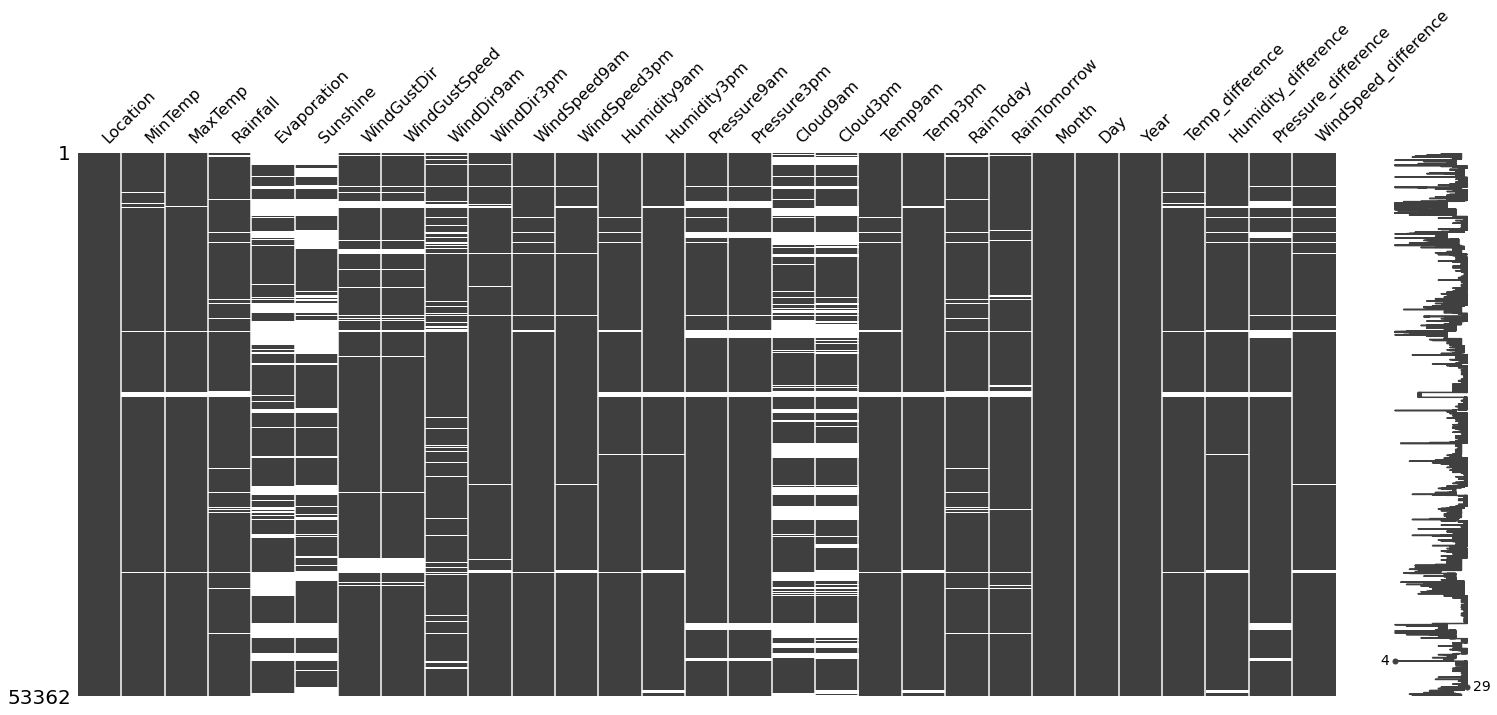

In [21]:
# Find the rows with missing values in the variables Evaporation and Sunshine

mask = rain_data['Evaporation'].isna() & rain_data['Sunshine'].isna()

# Select the indexes of the rows with missing values
indices_with_na = rain_data[mask].index

# Calculate the number of rows to remove
num_to_remove = int(0.5 * len(indices_with_na))

# Select randomly the indexes of the rows to remove
indices_to_remove = np.random.choice(indices_with_na, num_to_remove, replace=False)

# Delete the rows with missing values
rain_data.drop(indices_to_remove, inplace=True)

msno.matrix(rain_data)
missing_data = create_missing_data_frame(rain_data)
print(f'Shape of the data: {rain_data.shape}')
missing_data

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_dataset(train_data, test_data):
    """
    Impute missing values in both training and test datasets.
    Args:
    train_data: DataFrame containing the training data.
    test_data: DataFrame containing the test data.
    
    Returns:
    train_imputed: Training data with imputed values.
    test_imputed: Test data with imputed values, using the same imputer as training.
    """
    # Separate the features into numerical and categorical
    categorical_cols = train_data.select_dtypes(include=['object']).columns
    numerical_cols = train_data.select_dtypes(exclude=['object']).columns
    
    # Create copies of the original dataframes to avoid changing the original data
    train_imputed = train_data.copy()
    test_imputed = test_data.copy()
    
    # Imputation for numerical variables using MICE with KNN
    mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(), initial_strategy='median', max_iter=8, tol=0.01, random_state=42)
    train_imputed[numerical_cols] = mice_imputer.fit_transform(train_imputed[numerical_cols])
    test_imputed[numerical_cols] = mice_imputer.transform(test_imputed[numerical_cols])
    
    # Round Cloud9am and Cloud3pm after imputation for better interpretation
    cloud_cols = ['Cloud9am', 'Cloud3pm']
    for col in cloud_cols:
        train_imputed[col] = train_imputed[col].apply(lambda x: min(8, max(0, round(x))))
        test_imputed[col] = test_imputed[col].apply(lambda x: min(8, max(0, round(x))))
    
    # Imputation for categorical variables using Random Forest
    for column in categorical_cols:
        rf_imputer = RandomForestClassifier(n_estimators=100, random_state=42)
        if not train_imputed[train_imputed[column].notna()].empty:
            rf_imputer.fit(train_imputed[train_imputed[column].notna()].drop(columns=categorical_cols), train_imputed[train_imputed[column].notna()][column])
            
            # Impute training data if there are NaNs
            if train_imputed[column].isna().any():
                train_imputed.loc[train_imputed[column].isna(), column] = rf_imputer.predict(train_imputed[train_imputed[column].isna()].drop(columns=categorical_cols))
            
            # Impute test data if there are NaNs
            if test_imputed[column].isna().any():
                test_imputed.loc[test_imputed[column].isna(), column] = rf_imputer.predict(test_imputed[test_imputed[column].isna()].drop(columns=categorical_cols))

    
    return train_imputed, test_imputed


In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

def hide_data(df, columns_to_exclude, hide_ratio=0.1):
    """
    Randomly hides data in the DataFrame based on the specified ratio,
    except for the specified columns.
    """
    df_copy = df.copy()
    mask = np.random.rand(*df.shape) < hide_ratio
    mask_df = pd.DataFrame(mask, columns=df.columns, index=df.index)
    mask_df[columns_to_exclude] = False
    df_copy[mask_df] = np.nan
    original_data = df.where(mask_df)
    return df_copy, original_data

def evaluate_imputation(train_data, test_data, hide_ratio=0.1):
    """
    Imputes hidden data in the test dataset using models trained on the train dataset
    and evaluates the imputation quality.
    """
    excluded_columns = ['Sunshine', 'Evaporation', 'Date', 'Location', 'Month', 'Day', 'Year']
    test_data_hidden, original_test_data = hide_data(test_data, excluded_columns, hide_ratio)
    
    # Ensure impute_dataset function is adjusted to train on train_data and transform test_data
    # This function should now properly separate the returned imputed train and test data
    _, test_data_imputed = impute_dataset(train_data, test_data_hidden)  # Assuming impute_dataset returns a tuple (train_imputed, test_imputed)
    
    metrics_num = {}
    metrics_cat = {}

    for column in test_data.columns:
        if column in excluded_columns:
            continue
        if test_data[column].dtype in ['float64', 'int64']:
            valid_index = original_test_data[column].dropna().index
            if not valid_index.empty:
                mse = mean_squared_error(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index])
                r2 = r2_score(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index])
                metrics_num[column] = {'MSE': mse, 'R2': r2}
        elif test_data[column].dtype == 'object':
            valid_index = original_test_data[column].dropna().index
            if not valid_index.empty:
                accuracy = accuracy_score(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index])
                f1 = f1_score(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index], average='weighted')
                metrics_cat[column] = {'Accuracy': accuracy, 'F1 Score': f1}
    
    return metrics_num, metrics_cat


# Use case example
train_data_example, test_data_example = train_test_split(rain_data, test_size=0.2, random_state=42)
metrics_num, metrics_cat = evaluate_imputation(train_data_example, test_data_example, hide_ratio=0.1)

# Convert the results to DataFrames for better visualization
df_metrics_num = pd.DataFrame(metrics_num).T
df_metrics_cat = pd.DataFrame(metrics_cat).T

c:\Users\llucfurriols\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


### PRINT THE IMPUTATION RESULTS

In [28]:
# Print the results
print("Numerical Variables Imputation Metrics:")
df_metrics_num

Numerical Variables Imputation Metrics:


,MSE,R2
MinTemp,6.541574,0.833688
MaxTemp,5.466380,0.894299
Rainfall,136.664715,0.151436
WindGustSpeed,93.735295,0.562730
WindSpeed9am,18.157803,0.775113
WindSpeed3pm,17.622615,0.790869
Humidity9am,54.379384,0.855410
Humidity3pm,41.475306,0.905516
Pressure9am,11.910466,0.771216
Pressure3pm,13.189280,0.752429


In [24]:
print("Categorical Variables Imputation Metrics:")
df_metrics_cat

Categorical Variables Imputation Metrics:


,Accuracy,F1 Score
WindGustDir,0.205597,0.200976
WindDir9am,0.204854,0.195690
WindDir3pm,0.216936,0.210174
RainToday,0.977591,0.977628
RainTomorrow,0.793068,0.793217


In [29]:
imputed_rain_data = impute_dataset(rain_data)

# Visualize that there are no missing values
msno.matrix(imputed_rain_data)

TypeError: impute_dataset() missing 1 required positional argument: 'test_data'

In [26]:
print(rain_data.isnull().sum())

Location                    0
MinTemp                   897
MaxTemp                   857
Rainfall                 1948
Evaporation             15771
Sunshine                18531
WindGustDir              4122
WindGustSpeed            4091
WindDir9am               3183
WindDir3pm               1507
WindSpeed9am              682
WindSpeed3pm             1102
Humidity9am              1300
Humidity3pm              1986
Pressure9am              4029
Pressure3pm              4029
Cloud9am                15839
Cloud3pm                16943
Temp9am                   993
Temp3pm                  1681
RainToday                1948
RainTomorrow             2438
Month                       0
Day                         0
Year                        0
Temp_difference          1072
Humidity_difference      2241
Pressure_difference      4130
WindSpeed_difference     1300
dtype: int64


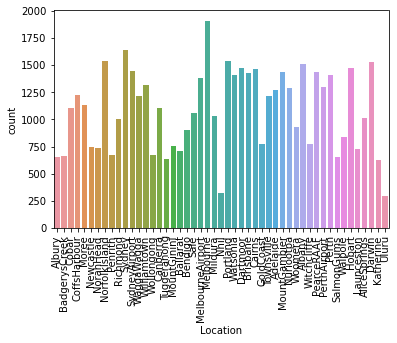

In [27]:
# Plot the distribution of the variable location

sns.countplot(x='Location', data=rain_data)
plt.xticks(rotation=90)
plt.show()